# Homework 2 for Niko Darby 

# ADALINE METHODOLOGY

## For this assignment, recapitulate the Adaline in 1-D observed within the Lab #3 module:  

 #### Instantiate necessary packages: 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Import the Iris dataset: 

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_iris()
super_data = pd.DataFrame(data.data).rename(columns={0:'sepal length (cm)', 1:'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)'})
super_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Add the Targets:

In [4]:
Sa = ['Setosa'] * 50
Vc = ['Versicolor'] * 50
Vg = ['Virginica'] * 50
target_power = pd.DataFrame(Sa + Vc + Vg).rename(columns={0:'Targets'})
target_power
super_data['Targets'] = target_power
super_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Targets
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Utilize the Adaline function from the Lab 3 notebook. Do know that this function is not a creation of Niko Darby. This function is simply being utilized from the Lab 3 notebook: 

In [71]:
import numpy as np

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[0])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0)

#### Instantiate the X and y values: 

In [6]:
# In this scenario, we are only allowed to use setosa and versicolor: 

y = super_data.iloc[0:100,4].values
y = np.where(y == 'Setosa', -1,1)

In [7]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
y.shape

(100,)

In [9]:
# Now attain the X value but with only one feature: Petal Length (cm): 
X = super_data.iloc[0:100,2].values
print("petal length (cm)",X)

petal length (cm) [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1]


In [10]:
X.shape

(100,)

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, train_size= 0.80, random_state= 1)


In [12]:
print("X_Train:", X_train)
print("X_Test:", X_test)
print("y_Train", y_train)
print("y_Test", y_test)

X_Train: [1.3 4.7 4.3 4.  1.5 1.2 4.2 1.5 1.6 1.3 4.1 4.1 4.6 4.2 4.1 1.3 1.5 3.9
 1.7 1.5 4.7 4.  5.  1.5 5.1 1.3 1.4 4.6 1.6 3.  1.6 4.5 1.9 1.4 4.6 1.4
 1.5 4.4 1.5 4.3 1.6 4.5 4.8 1.3 1.4 4.  1.4 3.5 1.4 4.4 3.3 1.  4.2 4.7
 1.5 4.2 1.1 4.5 4.5 1.2 1.6 1.4 1.6 1.7 1.7 4.7 1.6 1.4 4.  4.8 1.4 1.3
 3.6 3.5 1.7 4.4 1.5 4.9 1.4 1.4]
X_Test: [3.8 4.5 1.4 3.7 3.3 1.4 1.3 3.9 3.9 4.4 4.  1.5 4.7 4.9 4.5 1.5 1.5 1.9
 4.5 1.5]
y_Train [-1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1 -1
  1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1
 -1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1
  1  1 -1  1 -1  1 -1 -1]
y_Test [ 1  1 -1  1  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1]


#### Plot the one-dimensional data: 

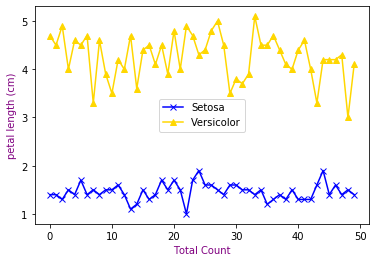

In [49]:
plt.plot(X[0:50],color="blue", marker="x", label="Setosa" )
plt.plot(X[50:100],color="gold", marker="^", label= "Versicolor")
plt.xlabel("Total Count", color="purple")
plt.ylabel("petal length (cm)", color= "purple")
plt.legend();

#### Train and plot the Sum of Squared-Error vs. Epochs:

In [74]:
#Utilized framework from the following class link: 
#https://github.com/umbcdata602/fall2020/blob/master/lab04_logistic_regression.ipynb

#Train the model:
eta_1 = 0.1
adaline_1 = AdalineGD(n_iter=10, eta=0.1)
adaline_1.fit(X_train,y_train)

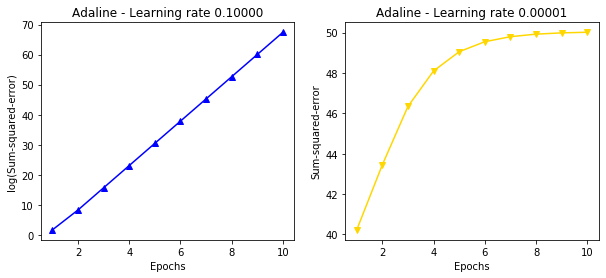

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].plot(range(1, len(adaline_1.cost_) + 1), np.log10(adaline_1.cost_), marker='^', color="blue")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate {:.5f}'.format(eta_1))

eta_2 = .00001
adaline_2 = AdalineGD(n_iter=10, eta=eta_2)
adaline_2.fit(X_train,y_train)
ax[1].plot(range(1, len(adaline_2.cost_) + 1), adaline_2.cost_, marker='v', color="gold")
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate {:.5f}'.format(eta_2))
plt.show()

#### The Third Plot: 

In [72]:
#Utilized from the class Github:
#https://github.com/umbcdata602/fall2020/blob/master/lab03_adaline.ipynb
 

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:].min() - 1, X[:].max() + 1 
    xx1= np.meshgrid(np.arange(x1_min, x1_max, resolution))
    Z = classifier.predict(np.array([xx1]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())


    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl], 
                    y=X[y == cl],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [73]:
# Plot the decision region
plot_decision_regions(X, y, classifier=adaline_2)
plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left');


ValueError: shapes (305,1,1) and (80,) not aligned: 1 (dim 2) != 80 (dim 0)

# LOGISTIC REGRESSION METHODOLOGY

#### Import the logistic regression function from the notebook: 

In [65]:
# Utilized from the class GitHub: 
# https://github.com/umbcdata602/fall2020/blob/master/lab04_logistic_regression.ipynb

class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[0])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [ ]:
#Example
#Adopted from text at following source:
#https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

In [ ]:
#Example
#Adopted from text at following source: 
#https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb

def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

In [ ]:
X = data.data[0:100,2]
y = data.target[0:100]

In [ ]:
X

In [62]:
y.min

<function ndarray.min>

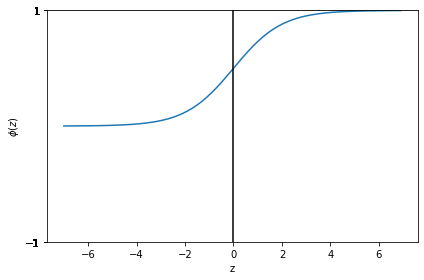

In [63]:
#Function procured from the class link: 
# https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(y.min(), y.max())
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks(y)
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

In [ ]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
y = sc.transform(y)
print(X,y)

In [ ]:
plt.plot(X[0:50],color="blue", marker="x", label="Setosa" )
plt.plot(X[50:100],color="gold", marker="^", label= "Versicolor")
plt.xlabel("Total Count", color="purple")
plt.ylabel("petal length (cm)", color= "purple")
plt.legend();

In [ ]:
y.shape

In [ ]:
#Utilized from the class Github:
#https://github.com/umbcdata602/fall2020/blob/master/lab03_adaline.ipynb

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[0:50].min() - 1, X[0:50].max() + 1
    x2_min, x2_max = X[50:100].min() - 1, X[50:100].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[0:50],
                    X_test[50:100],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [67]:
#Utilized code from the following source: 
# https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train,
         y_train)

plot_decision_regions(X=X_train, 
                      y=y_train,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


ValueError: shapes (305,1,1) and (80,) not aligned: 1 (dim 2) != 80 (dim 0)